In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Vertex AI PaLM API & Python SDK

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


## Overview

### What are LLMs?
Large language models (LLMs) are deep learning models trained on massive datasets of text. LLMs can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems.

### PaLM
Following its predecessor, [PaLM](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html), [PaLM 2](https://ai.google/discover/palm2) is Google's next generation large language model that builds on Google’s legacy of breakthrough research in machine learning and responsible AI. PaLM 2 excels at tasks like advanced reasoning, translation, and code generation because of how it was built.

PaLM 2 [excels](https://ai.google/static/documents/palm2techreport.pdf) at advanced reasoning tasks, including code and math, classification and question answering, translation and multilingual proficiency, and natural language generation better than our previous state-of-the-art LLMs, including PaLM. It can accomplish these tasks because of the way it was built – bringing together compute-optimal scaling, an improved dataset mixture, and model architecture improvements.

PaLM 2 is grounded in Google’s approach to building and deploying AI responsibly. It was evaluated rigorously for its potential harms and biases, capabilities and downstream uses in research and in-product applications. It’s being used in other state-of-the-art models, like Med-PaLM 2 and Sec-PaLM, and is powering generative AI features and tools at Google, like Bard and the PaLM API.

PaLM is pre-trained on a wide range of text data using an unsupervised learning approach, without any specific task. During this pre-training process, PaLM learns to predict the next word in a sentence, given the preceding words. This enables the model to generate coherent, fluent text resembling human writing.
This large size enables it to learn complex patterns and relationships in language and generate high-quality text for various applications. This is why models like PaLM are referred to as "foundational models."

Creating an LLM requires massive amounts of data, significant compute resources, and specialized skills. Because LLMs require a big investment to create, they target broad rather than specific use cases. On Vertex AI, you can customize a foundation model for more specific tasks or knowledge domains by using prompt design and model tuning.

### Vertex AI PaLM API
The Vertex AI PaLM API, [released on May 10, 2023](https://cloud.google.com/vertex-ai/docs/generative-ai/release-notes#may_10_2023), is powered by [PaLM 2](https://ai.google/discover/palm2).

### Using Vertex AI PaLM API

You can interact with the Vertex AI PaLM API using the following methods:

* Use the [Generative AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation.
* Use cURL commands in Cloud Shell.
* Use the Python SDK in a Jupyter notebook

This notebook focuses on using the Python SDK to call the Vertex AI PaLM API. For more information on using Generative AI Studio without writing code, you can explore [Getting Started with the UI instructions](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_generative_ai_studio.md)


For more information, check out the [documentation on generative AI support for Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objectives

In this tutorial, you will learn how to use PaLM API with the Python SDK and explore its various parameters.

By the end of the notebook, you should be able to understand various nuances of generative model parameters like `temperature`, `top_k`, `top_p`, and how each parameter affects the results.

The steps performed include:

- Installing the Python SDK
- Using Vertex AI PaLM API
  - Text generation model with `text-bison@001`
    - Understanding model parameters (`temperature`, `max_output_token`,  `top_k`, `top_p`)
  - Chat model with `chat-bison@001`
  - Embeddings model with `textembedding-gecko@001`
  

### Costs
This tutorial uses billable components of Google Cloud:

* Vertex AI Generative AI Studio

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

### Data governance and security
For more information, see the documentation on [Data Governance and Generative AI](https://cloud.google.com/vertex-ai/docs/generative-ai/data-governance) on Google Cloud.

### Responsible AI
Large language models (LLMs) can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. At the same time, as an early-stage technology, its evolving capabilities and uses create potential for misapplication, misuse, and unintended or unforeseen consequences. Large language models can generate output that you don't expect, including text that's offensive, insensitive, or factually incorrect.

What's more, the incredible versatility of LLMs is also what makes it difficult to predict exactly what kinds of unintended or unforeseen outputs they might produce. Given these risks and complexities, the PaLM API is designed with [Google's AI Principles](https://ai.google/principles/) in mind. However, it is important for developers to understand and test their models to deploy safely and responsibly. To aid developers, the Generative AI Studio has built-in content filtering, and the PaLM API has safety attribute scoring to help customers test Google's safety filters and define confidence thresholds that are right for their use case and business. Please refer to the [Safety filters and attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) section to learn more.

When the PaLM API is integrated into a customer's unique use case and context, additional responsible AI considerations and [PaLM limitations](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#palm_limitations) may need to be considered. We encourage customers to leverage fairness, interpretability, privacy and security [recommended practices](https://ai.google/responsibilities/responsible-ai-practices/).

## Getting Started

### Install Vertex AI SDK

In [1]:
!pip install google-cloud-aiplatform==1.36.2 --upgrade --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.41.0
    Uninstalling google-cloud-aiplatform-1.41.0:
      Successfully uninstalled google-cloud-aiplatform-1.41.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Colab only:** Run the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [2]:
# Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticating your notebook environment

- If you are using **Colab** to run this notebook, run the cell below and continue.
- If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

- If you are running this notebook in a local development environment:
  - Install the [Google Cloud SDK](https://cloud.google.com/sdk).
  - Obtain authentication credentials. Create local credentials by running the following command and following the oauth2 flow (read more about the command [here](https://cloud.google.com/sdk/gcloud/reference/beta/auth/application-default/login)):

    ```bash
    gcloud auth application-default login
    ```

## Vertex AI PaLM API models

The Vertex AI PaLM API enables you to test, customize, and deploy instances of Google’s large language models (LLM) called as PaLM,  so that you can leverage the capabilities of PaLM in your applications.

### Model naming scheme
Foundation model names have three components: use case, model size, and version number. The naming convention is in the format:  
`<use case>-<model size>@<version number>`

For example, text-bison@001 represents the Bison text model, version 001.

The model sizes are as follows:
- **Bison**: The best value in terms of capability and cost.
- **Gecko**: The smallest and cheapest model for simple tasks.

### Available models

The Vertex AI PaLM API currently supports five models:

*   `text-bison@001` : Fine-tuned to follow natural language instructions and is suitable for a variety of language tasks.
*   `chat-bison@001` : Fine-tuned for multi-turn conversation use cases like building a chatbot.
*   `textembedding-gecko@001` : Returns model embeddings for text inputs.

* `code-bison@001`: A model fine-tuned to generate code based on a natural language description of the desired code. For example, it can generate a unit test for a function.

* `code-gecko@001`: A model fine-tuned to suggest code completion based on the context in code that's written.

* `codechat-bison@001`: A model fine-tuned for chatbot conversations that help with code-related questions.

You can find more information about the properties of these [foundational models in the Generative AI Studio documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).


### Import libraries

**Colab only:** Run the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.

In [3]:
import vertexai

PROJECT_ID = "qwiklabs-gcp-01-f3f1ca7de6bf"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI SDK
vertexai.init(project=PROJECT_ID, location=REGION)

In [4]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.language_models import (
    TextGenerationModel,
    TextEmbeddingModel,
    ChatModel,
    InputOutputTextPair,
    CodeGenerationModel,
    CodeChatModel,
)

## Text generation with `text-bison@001`

The text generation model from PaLM API that you will use in this notebook is `text-bison@001`.
It is fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:

- Classification
- Sentiment analysis
- Entity extraction
- Extractive question-answering
- Summarization
- Re-writing text in a different style
- Ad copy generation
- Concept ideation
- Concept simplification

#### Load model

In [5]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### Prompt design
Prompt design is the process of creating prompts that elicit the desired response from a language model. Prompt design is an important part of using language models because it allows non-specialists to control the output of the model with minimal overhead. By carefully crafting the prompts, you can nudge the model to generate a desired result. Prompt design can be an efficient way to experiment with adapting an LLM for a specific use case. The iterative process of repeatedly updating prompts and assessing the model’s responses is sometimes called prompt engineering.

#### Hello PaLM

Create your first prompt and send it to the text generation model.

In [6]:
prompt = "What is a large language model?"

response = generation_model.predict(prompt=prompt)

print(response.text)

A large language model (LLM) is a type of artificial intelligence (AI) model that can understand and generate human language. LLMs are trained on massive datasets of text and code, and they can learn to perform a wide variety of tasks, such as translating languages, writing different kinds of creative content, and answering your questions in an informative way.

LLMs are still under development, but they have the potential to revolutionize many industries. For example, LLMs could be used to create more accurate and personalized customer service experiences, to help doctors diagnose and treat diseases, and to even write entire books and movies.




#### Try out your own prompt

- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in the retail industry?
- (Try your own prompts!)

In [7]:
prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words."""  # try your own prompt

response = generation_model.predict(prompt=prompt)

print(response.text)

1. **Artificial intelligence**
2. **Machine learning**
3. **Blockchain**
4. **Virtual reality**
5. **Augmented reality**
6. **5G**
7. **Edge computing**
8. **Internet of things**
9. **Self-driving cars**
10. **Wearables**


#### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings.

In [8]:
my_industry = "tech"  # try changing this to a different industry

response = generation_model.predict(
    prompt=f"""Create a numbered list of 10 items. Each item in the list should
    be a trend in the {my_industry} industry.

    Each trend should be less than 5 words."""
)

print(response.text)

1. **Artificial intelligence**
2. **Machine learning**
3. **Blockchain**
4. **Virtual reality**
5. **Augmented reality**
6. **5G**
7. **Edge computing**
8. **Internet of things**
9. **Self-driving cars**
10. **Wearables**


### Model parameters for `text-bison@001`

You can customize how the PaLM API behaves in response to your prompt by using the following parameters for `text-bison@001`:

 - `temperature`: higher means more "creative" responses
 - `max_output_tokens`: sets the max number of tokens in the output
 - `top_p`: higher means it will pull from more possible next tokens, based on cumulative probability
 - `top_k`: higher means it will sample from more possible next tokens

The section below covers each parameter and how to use them.

#### The `temperature` parameter (range: 0.0 - 1.0, default 0)

##### What is _temperature_?
The temperature is used for sampling during the response generation, which occurs when top_p and top_k are applied. Temperature controls the degree of randomness in token selection.

##### How does _temperature_ affect the response?
Lower temperatures are good for prompts that require a more deterministic and less open-ended response. In comparison, higher temperatures can lead to more "creative" or diverse results. A temperature of `0` is deterministic: the highest probability response is always selected. For most use cases, try starting with a temperature of `0.2`.

A higher temperature value will result in a more exploratative output, with a higher likelihood of generating rare or unusual words or phrases. Conversely, a lower temperature value will result in a more conservative output, with a higher likelihood of generating common or expected words or phrases.

##### Example:

For example,

`temperature = 0.0`:

* _The cat sat on the couch, watching the birds outside._
* _The cat sat on the windowsill, basking in the sun._

`temperature = 0.9`:

* _The cat sat on the moon, meowing at the stars._
* _The cat sat on the cheeseburger, purring with delight._

**Note**: It's important to note that while the temperature parameter can help generate more diverse and interesting text, it can also increase the likelihood of generating nonsensical or inappropriate text (i.e. hallucinations). Therefore, it's important to use it carefully and with consideration for the desired outcome.

For more information on the `temperature` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

If you run the following cell multiple times, it should always return the same response, as `temperature=0` is deterministic.

In [9]:
temp_val = 0.0
prompt_temperature = "Complete the sentence: As I prepared the picture frame, I reached into my toolkit to fetch my:"

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 0.0]
As I prepared the picture frame, I reached into my toolkit to fetch my hammer.


If you run the following cell multiple times, it may return different responses, as higher temperature values can lead to more diverse results, even though the prompt is the same as the above cell.

In [10]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 1.0]
As I prepared the picture frame, I reached into my toolkit to fetch my hammer.

The sentence is describing the preparation of a picture frame. The word "hammer" is related to the picture frame.


#### The `max_output_tokens` parameter (range: 1 - 1024, default 128)

##### Tokens
A single token may be smaller than a word. For example, a token is approximately four characters. So 100 tokens correspond to roughly 60-80 words. It's essential to be aware of the token sizes as models have a limit on input and output tokens.

##### What is _max_output_tokens_?
`max_output_tokens` is the maximum number of tokens that can be generated in the response.

##### How does _max_output_tokens_ affect the response?

Specify a lower value for shorter responses and a higher value for longer responses. A token may be smaller than a word. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

For more information on the `max_output_tokens` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [11]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt="List ten ways that generative AI can help improve the online shopping experience for users",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 5]
1. **Personal


In [12]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt="List ten ways that generative AI can help improve the online shopping experience for users",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 500]
1. **Personalized recommendations.** Generative AI can be used to create personalized recommendations for users based on their past purchases, browsing history, and other factors. This can help users find products that they are interested in and that are likely to be a good fit for them.
2. **Virtual try-on.** Generative AI can be used to create virtual try-on experiences for users, allowing them to see how different products would look on them before they buy them. This can help users make more informed decisions about their purchases and reduce the risk of buyer's remorse.
3. **Product design.** Generative AI can be used to help designers create new products that are more innovative and appealing to consumers. This can help businesses stay ahead of the competition and bring new products to market faster.
4. **Pricing.** Generative AI can be used to help businesses set prices for their products. This can help businesses maximize their profits and ensure that 

For easier reading, you can also render Markdown in Jupyter:

In [13]:
display(Markdown(response.text))

1. **Personalized recommendations.** Generative AI can be used to create personalized recommendations for users based on their past purchases, browsing history, and other factors. This can help users find products that they are interested in and that are likely to be a good fit for them.
2. **Virtual try-on.** Generative AI can be used to create virtual try-on experiences for users, allowing them to see how different products would look on them before they buy them. This can help users make more informed decisions about their purchases and reduce the risk of buyer's remorse.
3. **Product design.** Generative AI can be used to help designers create new products that are more innovative and appealing to consumers. This can help businesses stay ahead of the competition and bring new products to market faster.
4. **Pricing.** Generative AI can be used to help businesses set prices for their products. This can help businesses maximize their profits and ensure that they are not overcharging or undercharging for their products.
5. **Marketing.** Generative AI can be used to create marketing campaigns that are more effective and targeted. This can help businesses reach a wider audience and generate more leads.
6. **Customer service.** Generative AI can be used to provide customer service in a more efficient and personalized way. This can help businesses resolve customer issues faster and improve customer satisfaction.
7. **Fraud detection.** Generative AI can be used to detect fraud in online transactions. This can help businesses protect themselves from financial loss and ensure that their customers are safe.
8. **Inventory management.** Generative AI can be used to help businesses manage their inventory more effectively. This can help businesses avoid stockouts and ensure that they have the right products in stock when customers need them.
9. **Supply chain management.** Generative AI can be used to help businesses manage their supply chains more efficiently. This can help businesses reduce costs and improve delivery times.
10. **Logistics.** Generative AI can be used to help businesses optimize their logistics operations. This can help businesses reduce costs and improve the efficiency of their shipping and delivery processes.

#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)

##### What is _top_p_?
`top_p` controls how the model selects tokens for output by adjusting the probability distribution of the next word in the generated text based on a cumulative probability cutoff. Specifically, it selects the smallest set of tokens whose cumulative probability exceeds the given cutoff probability _p_, and samples from this set uniformly.


For example, suppose tokens A, B, and C have a probability of 0.3, 0.2, and 0.1, and the `top_p` value is 0.5. In that case, the model will select either A or B as the next token (using temperature) and not consider C, because the cumulative probability of top_p is <= 0.5. Specify a lower value for less random responses and a higher value for more random responses.

##### How does _top_p_ affect the response?

The `top_p` parameter is used to control the diversity of the generated text. A higher `top_p` parameter value results in more "diverse" and "interesting" outputs, with the model being allowed to sample from a larger pool of possibilities. In contrast, a lower `top_p` parameter value resulted in more predictable outputs, with the model being constrained to a smaller set of possible tokens.


##### Example:

`top_p = 0.1`:

- The cat sat on the mat.
- The cat sat on the floor.

`top_p = 0.9`:

- The cat sat on the windowsill, soaking up the sun's rays.
- The cat sat on the edge of the bed, watching the birds outside.

For more information on the `top_p` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [14]:
top_p_val = 0.0
prompt_top_p_example = (
    "Create a marketing campaign for jackets that involves blue elephants and avocados."
)

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 0.0]
**Introducing the new Blue Elephant Avocado Jacket!**

This stylish jacket is perfect for anyone who wants to make a statement. With its bright blue color and fun avocado print, it's sure to turn heads wherever you go.

But this jacket is more than just a fashion statement. It's also made from high-quality materials that will keep you warm and comfortable all winter long.

So if you're looking for a jacket that will keep you looking and feeling your best, look no further than the Blue Elephant Avocado Jacket!

**Here are some of the benefits of owning a Blue Elephant Avocado


In [15]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 1.0]
**Introducing the new Blue Elephant Avocado Jacket!**

This jacket is the perfect way to show your love of both blue elephants and avocados. It's made from soft, durable fabric and features a warm, fleece lining. The front has a large blue elephant print, and the back has a smaller avocado print.

This jacket is perfect for any occasion, from a day out on the town to a night on the couch. It's also great for travel, as it's lightweight and easy to pack.

**Order your Blue Elephant Avocado Jacket today!**

**Here are some of the benefits


#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [16]:
prompt_top_k_example = "Write a 2-day itinerary for France."
top_k_val = 1

response = generation_model.predict(
    prompt=prompt_top_k_example, max_output_tokens=300, temperature=0.9, top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 1]
Day 1:
* Morning: Start your day in Paris with a visit to the Eiffel Tower. Take the elevator to the top for stunning views of the city.
* Afternoon: After lunch, visit the Louvre Museum, one of the largest and most famous museums in the world. See some of the most iconic works of art, including the Mona Lisa and Venus de Milo.
* Evening: Enjoy a romantic dinner in Montmartre, a charming neighborhood with cobblestone streets and cafés.

Day 2:
* Morning: Take a day trip to Versailles, the former home of French royalty. Explore the opulent palace and gardens.
* Afternoon: Visit the Palace of Fontainebleau, another former royal residence. See the beautiful architecture and gardens.
* Evening: Enjoy a leisurely dinner in Paris before catching your flight home.


In [17]:
top_k_val = 40

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val,
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 40]
**Day 1:**

* Morning: Arrive in Paris and check into your hotel.
* Afternoon: Visit the Eiffel Tower, the Louvre Museum, or the Champs-Elysees.
* Evening: Have dinner at a traditional French restaurant.

**Day 2:**

* Morning: Visit the Palace of Versailles or the Sacré-Cœur Basilica.
* Afternoon: Take a boat trip down the River Seine.
* Evening: Enjoy a show at the Moulin Rouge or the Lido.

Of course, this is just a suggested itinerary. You can customize it to fit your interests and budget. There are many other things to see and do in France, so be sure to do some research before you go to make the most of your trip.


## Chat model with `chat-bison@001`

The `chat-bison@001` model lets you have a freeform conversation across multiple turns. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application, use the `chat-bison@001` model because it has been fine-tuned for multi-turn conversation use cases.

In [18]:
chat_model = ChatModel.from_pretrained("chat-bison@001")

chat = chat_model.start_chat()

print(
    chat.send_message(
        """
Hello! Can you write a 300 word abstract for a research paper I need to write about the impact of AI on society?
"""
    )
)

MultiCandidateTextGenerationResponse(text="Artificial intelligence (AI) is a branch of computer science that deals with the creation of intelligent agents, which are systems that can reason, learn, and act autonomously. AI has the potential to revolutionize many aspects of our lives, from the way we work and play to the way we interact with the world around us.\n\nThe impact of AI on society is a complex and multifaceted issue. On the one hand, AI has the potential to solve some of the world's most pressing problems, such as climate change, poverty, and disease. AI can also be used to create new products and services that improve our lives in ways that we can't even imagine.\n\nOn the other hand, AI also poses a number of risks to society. AI systems can be used to create autonomous weapons systems that could kill without human intervention. AI can also be used to create surveillance systems that track and monitor our every move.\n\nThe future of AI is uncertain. It is possible that AI

As shown below, the model should respond based on what was previously said in the conversation:

In [19]:
print(
    chat.send_message(
        """
Could you give me a catchy title for the paper?
"""
    )
)

MultiCandidateTextGenerationResponse(text='The Impact of Artificial Intelligence on Society', _prediction_response=Prediction(predictions=[{'candidates': [{'content': 'The Impact of Artificial Intelligence on Society', 'author': 'bot'}], 'safetyAttributes': [{'categories': ['Derogatory', 'Finance', 'Health', 'Insult', 'Sexual'], 'scores': [0.1, 0.1, 0.3, 0.2, 0.1], 'safetyRatings': [{'severity': 'NEGLIGIBLE', 'severityScore': 0.1, 'category': 'Dangerous Content', 'probabilityScore': 0.1}, {'severity': 'NEGLIGIBLE', 'category': 'Harassment', 'probabilityScore': 0.2, 'severityScore': 0.1}, {'severity': 'NEGLIGIBLE', 'severityScore': 0.1, 'category': 'Hate Speech', 'probabilityScore': 0.1}, {'severity': 'NEGLIGIBLE', 'category': 'Sexually Explicit', 'severityScore': 0.0, 'probabilityScore': 0.1}], 'blocked': False}], 'citationMetadata': [{'citations': []}], 'groundingMetadata': [{}]}], deployed_model_id='', model_version_id='', model_resource_name='', explanations=None), is_blocked=False,

### Advanced Chat model with the SDK
You can also provide a `context` and `examples` to the model. The model will then respond based on the provided context and examples. You can also use `temperature`, `max_output_tokens`, `top_p`, and `top_k`. These parameters should be used when you start your chat with `chat_model.start_chat()`.

For more information on chat models, please refer to the [documentation on chat model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [20]:
chat = chat_model.start_chat(
    context="My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.",
    examples=[
        InputOutputTextPair(
            input_text="Who do you work for?",
            output_text="I work for Ned.",
        ),
        InputOutputTextPair(
            input_text="What do I like?",
            output_text="Ned likes watching movies.",
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40,
)
print(chat.send_message("Are my favorite movies based on a book series?"))

MultiCandidateTextGenerationResponse(text='Yes, Lord of the Rings and Hobbit are both based on book series.', _prediction_response=Prediction(predictions=[{'safetyAttributes': [{'categories': ['Derogatory', 'Insult', 'Religion & Belief', 'Sexual'], 'blocked': False, 'safetyRatings': [{'severity': 'NEGLIGIBLE', 'probabilityScore': 0.0, 'severityScore': 0.0, 'category': 'Dangerous Content'}, {'category': 'Harassment', 'severityScore': 0.0, 'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1}, {'severity': 'NEGLIGIBLE', 'severityScore': 0.1, 'probabilityScore': 0.1, 'category': 'Hate Speech'}, {'severityScore': 0.0, 'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1, 'category': 'Sexually Explicit'}], 'scores': [0.1, 0.1, 0.2, 0.1]}], 'citationMetadata': [{'citations': []}], 'candidates': [{'author': '1', 'content': 'Yes, Lord of the Rings and Hobbit are both based on book series.'}], 'groundingMetadata': [{}]}], deployed_model_id='', model_version_id='', model_resource_name='', explanations

In [21]:
print(chat.send_message("When where these books published?"))

MultiCandidateTextGenerationResponse(text='The Lord of the Rings was published in 1954 and 1955. The Hobbit was published in 1937.', _prediction_response=Prediction(predictions=[{'citationMetadata': [{'citations': []}], 'groundingMetadata': [{}], 'candidates': [{'author': 'bot', 'content': 'The Lord of the Rings was published in 1954 and 1955. The Hobbit was published in 1937.'}], 'safetyAttributes': [{'scores': [0.1, 0.1, 0.1, 0.2, 0.2], 'safetyRatings': [{'category': 'Dangerous Content', 'probabilityScore': 0.1, 'severityScore': 0.0, 'severity': 'NEGLIGIBLE'}, {'probabilityScore': 0.1, 'category': 'Harassment', 'severity': 'NEGLIGIBLE', 'severityScore': 0.0}, {'severityScore': 0.0, 'category': 'Hate Speech', 'probabilityScore': 0.1, 'severity': 'NEGLIGIBLE'}, {'severityScore': 0.1, 'category': 'Sexually Explicit', 'probabilityScore': 0.2, 'severity': 'NEGLIGIBLE'}], 'blocked': False, 'categories': ['Derogatory', 'Finance', 'Insult', 'Religion & Belief', 'Sexual']}]}], deployed_model_

## Embedding model with `textembedding-gecko@001`

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [22]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

embeddings = embedding_model.get_embeddings(["What is life?"])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[0.010562753304839134, 0.04915031045675278, -0.022224493324756622, 0.0208794716745615, 0.024389723315835, 0.010366306640207767, 0.023919280618429184, 0.022391626611351967, -0.031569067388772964, 0.023535897955298424, -0.017047161236405373, -0.014345862902700901, 0.044956106692552567, 0.027327297255396843, -0.03314697742462158, -0.028214626014232635, -0.035373710095882416, -0.05229683220386505, 0.017105583101511, -0.03780610114336014, -0.07891207933425903, -0.01173518318682909, -0.01629730500280857, -0.04353305324912071, 0.013023999519646168, -0.10904901474714279, -0.0341256819665432, -0.0025329082272946835, -0.036971937865018845, -0.027775181457400322, 0.02332289144396782, 0.0052000475116074085, 0.005503748077899218, 0.0047489493153989315, -0.029920609667897224, 0.07563772797584534, 0.0007565636187791824, 0.03501711040735245, 0.02154686115682125, -0.000812096637673676, 0.06169590726494789, -0.024313345551490784, 0.03736764192581177, -0.0005869767046533525, -0.0228724572807

#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [23]:
text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [ ]:
df

In [24]:
df["embeddings"] = df.apply(
    lambda x: embedding_model.get_embeddings([x.text])[0].values, axis=1
)
df

,text,embeddings
0,i really enjoyed the movie last night,"[-0.015481960028409958, 0.010654411278665066, ..."
1,so many amazing cinematic scenes yesterday,"[-0.04475008696317673, 0.03850521519780159, -0..."
2,had a great time writing my Python scripts a f...,"[-0.002235855208709836, -0.009281235747039318,..."
3,huge sense of relief when my .py script finall...,"[-0.01665080338716507, 0.009947526268661022, 0..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.04232335463166237, -0.02867126651108265, 0...."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences.

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [25]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?"
i really enjoyed the movie last night,1.000000,0.719884,0.631067,0.551936,0.459312
so many amazing cinematic scenes yesterday,0.719884,1.000000,0.622285,0.564447,0.524029
had a great time writing my Python scripts a few days ago,0.631067,0.622285,1.000000,0.738914,0.449386
huge sense of relief when my .py script finally ran without error,0.551936,0.564447,0.738914,1.000000,0.435728
"O Romeo, Romeo, wherefore art thou Romeo?",0.459312,0.524029,0.449386,0.435728,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

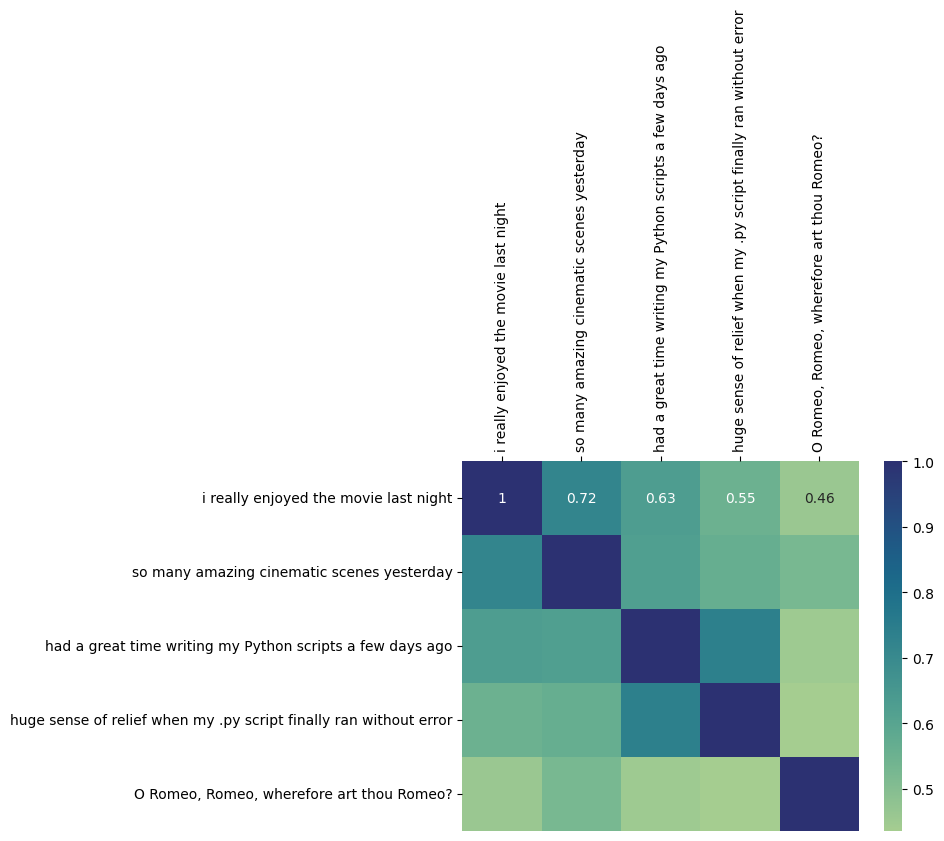

In [26]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Code generation with code-bison@001


The code generation model (Codey) from PaLM API that you will use in this notebook is code-bison@001. It is fine-tuned to follow natural language instructions to generate required code and is suitable for a variety of coding tasks, such as:

- writing functions
- writing classes
- web-pages
- unit tests
- docstrings
- code translations, and many more use-cases.

Currently it supports the following languages:
- C++
- C#
- Go
- GoogleSQL
- Java
- JavaScript
- Kotlin
- PHP
- Python
- Ruby
- Rust
- Scala
- Swift
- TypeScript

You can find our more details [here](https://cloud.google.com/vertex-ai/docs/generative-ai/code/code-models-overview).

### Load model

In [27]:
code_generation_model = CodeGenerationModel.from_pretrained("code-bison@001")

### Model parameters for `code-bison@001`

You can customize how the PaLM API code generation behaves in response to your prompt by using the following parameters for `code-bison@001`:

 - `prefix`: it represents the beginning of a piece of meaningful programming code or a natural language prompt that describes code to be generated.
 - `temperature`: higher means more "creative" code responses. range: (0.0 - 1.0, default 0).
 - `max_output_tokens`: sets the max number of tokens in the output. range: (1 - 2048, default 2048)


### Hello Codey

In [28]:
prefix = "write a python function to do binary search"

response = code_generation_model.predict(prefix=prefix)

print(response.text)

```python
def binary_search(array, target):
  """
  Performs a binary search on the given array for the given target value.

  Args:
    array: The array to search.
    target: The target value to search for.

  Returns:
    The index of the target value in the array, if found. Otherwise, -1.
  """

  # Check if the array is empty.
  if not array:
    return -1

  # Find the middle index of the array.
  middle_index = len(array) // 2

  # Check if the target value is equal to the middle element.
  if array[middle_index] == target:
    return middle_index

  # Check if the target value is less than the middle element.
  elif target < array[middle_index]:
    return binary_search(array[:middle_index], target)

  # Otherwise, the target value must be greater than the middle element.
  else:
    return binary_search(array[middle_index + 1:], target)
```


### Try out your own prompt

Some examples:
* write Go program to extract ip addresses from the text file
* write Java program that can extract pincodes from addresses
* write a standard SQL function that strips all non-alphabet characters from the string and encodes it to utf-8

In [29]:
prefix = """write a python function named as "calculate_cosine_similarity" and three unit \
            tests where it takes two arguments "vector1" and "vector2". \
            It then uses numpy dot function to calculate the dot product of the two vectors. \n
          """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```python
def calculate_cosine_similarity(vector1, vector2):

  """Calculates the cosine similarity between two vectors.

  The cosine similarity is a measure of the similarity between two vectors.
  It is calculated by taking the dot product of the two vectors and dividing
  it by the product of their magnitudes.

  Args:
    vector1: A numpy array representing the first vector.
    vector2: A numpy array representing the second vector.

  Returns:
    The cosine similarity between the two vectors.
  """

  # Calculate the dot product of the two vectors.
  dot_product = np.dot(vector1, vector2)

  # Calculate the magnitudes of the two vectors.
  magnitude1 = np.linalg.norm(vector1)
  magnitude2 = np.linalg.norm(vector2)

  # Calculate the cosine similarity.
  cosine_similarity = dot_product / (magnitude1 * magnitude2)

  return cosine_similarity


# Unit tests

def test_calculate_cosine_similarity_with_equal_vectors():

  """Tests that the cosine similarity between two equal vectors i

### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings. This way you can structure the prompts as per the expected funcationality of the code.

In [30]:
language = "C++ function"
file_format = "json"
extract_info = "names"
requirments = """
              - the name should be start with capital letters.
              - There should be no duplicate names in the final list.
              """

prefix = f"""Create a {language} to parse {file_format} and extract {extract_info} with the following requirements: {requirments}.
              """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```c++
#include <iostream>
#include <string>
#include <vector>
#include <map>

using namespace std;

// This function parses a JSON string and extracts all of the names.
// The names are returned in a vector of strings.
vector<string> getNamesFromJson(string json) {
  // Create a map to store the names.
  map<string, bool> names;

  // Parse the JSON string.
  stringstream ss(json);
  json::value_parser<string> parser;
  while (ss >> parser) {
    // Get the name of the current object.
    string name = parser.get_name();

    // If the name is not already in the map, add it.
    if (!names.count(name)) {
      names[name] = true;
    }
  }

  // Create a vector to store the names.
  vector<string> namesList;

  // Add all of the names to the vector.
  for (map<string, bool>::iterator it = names.begin(); it != names.end(); it++) {
    namesList.push_back(it->first);
  }

  // Return the vector of names.
  return namesList;
}

int main() {
  // Get the JSON string from the user.
  cout 

## Code completion with `code-gecko@001`

Code completion uses the code-gecko foundation model to generate and complete code based on code being written. `code-gecko` completes code that was recently typed by a user.

To learn more about creating prompts for code completion, see [Create prompts for code completion.](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-completion#:~:text=code%20completion%2C%20see-,Create%20prompts%20for%20code%20completion,-.)

Code completion API has few more parameters than code generation.

* prefix: *required* : For code models, prefix represents the beginning of a piece of meaningful programming code or a natural language prompt that describes code to be generated.

* suffix: *optional* : For code completion, suffix represents the end of a piece of meaningful programming code. The model attempts to fill in the code in between the prefix and suffix.

* temperature:  *required* : Temperature controls the degree of randomness in token selection. Same as for other models. range: (0.0 - 1.0, default 0)

* maxOutputTokens: *required* : Maximum number of tokens that can be generated in the response. **range: (1 - 64, default 64)**

* stopSequences: *optional*  : Specifies a list of strings that tells the model to stop generating text if one of the strings is encountered in the response. The strings are case-sensitive.

In [31]:
code_completion_model = CodeGenerationModel.from_pretrained("code-gecko@001")

In [32]:
prefix = """
          def find_x_in_string(string_s, x):
         """

response = code_completion_model.predict(prefix=prefix, max_output_tokens=64)

print(response.text)

     return string_s.find(x)

          def find_y_in_string(string_s, y):
              return string_s.find(y)


In [33]:
prefix = """
         def reverse_string(s):
            return s[::-1]
         def test_empty_input_string()
         """

response = code_completion_model.predict(prefix=prefix, max_output_tokens=64)

print(response.text)

   assert reverse_string("") == ""
         def test_one_character_input_string()
            assert reverse_string("a") == "a"
         def test_two_character_input_string()
            assert reverse_string("ab") == "ba


## Code chat with `codechat-bison@001`

The `codechat-bison@001` model lets you have a freeform conversation across multiple turns from a code context. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application for code generation, use the `codechat-bison@001` model because it has been fine-tuned for multi-turn conversation use cases.

In [34]:
code_chat_model = CodeChatModel.from_pretrained("codechat-bison@001")

code_chat = code_chat_model.start_chat()

print(
    code_chat.send_message(
        "Please help write a function to calculate the min of two numbers",
    )
)

MultiCandidateTextGenerationResponse(text='Sure, here is a function that calculates the minimum of two numbers:\n\n```\ndef min(a, b):\n  """\n  Calculates the minimum of two numbers.\n\n  Args:\n    a: The first number.\n    b: The second number.\n\n  Returns:\n    The smaller of the two numbers.\n  """\n\n  if a < b:\n    return a\n  else:\n    return b\n```\n\nThis function takes two numbers as input and returns the smaller of the two numbers. For example, if you call the function with the numbers 5 and 10, it will return 5.', _prediction_response=Prediction(predictions=[{'groundingMetadata': [{}], 'candidates': [{'author': '1', 'content': 'Sure, here is a function that calculates the minimum of two numbers:\n\n```\ndef min(a, b):\n  """\n  Calculates the minimum of two numbers.\n\n  Args:\n    a: The first number.\n    b: The second number.\n\n  Returns:\n    The smaller of the two numbers.\n  """\n\n  if a < b:\n    return a\n  else:\n    return b\n```\n\nThis function takes two n

As shown below, the model should respond based on what was previously asked in the conversation:

In [35]:
print(
    code_chat.send_message(
        "can you explain the code line by line in bullets?",
    )
)

MultiCandidateTextGenerationResponse(text='Sure, here is an explanation of the code line by line:\n\n* The function is defined with the name `min`.\n* The function takes two numbers as input, `a` and `b`.\n* The function returns the smaller of the two numbers.\n* The function first checks if `a` is less than `b`.\n* If `a` is less than `b`, the function returns `a`.\n* Otherwise, the function returns `b`.', _prediction_response=Prediction(predictions=[{'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'categories': [], 'blocked': False, 'scores': []}], 'candidates': [{'author': 'bot', 'content': 'Sure, here is an explanation of the code line by line:\n\n* The function is defined with the name `min`.\n* The function takes two numbers as input, `a` and `b`.\n* The function returns the smaller of the two numbers.\n* The function first checks if `a` is less than `b`.\n* If `a` is less than `b`, the function returns `a`.\n* Otherwise, the function returns `b`.'}], 'groundingMet

You can take another example and ask the model to give more general code suggestion for a specific problem that you are working on.

In [36]:
code_chat = code_chat_model.start_chat()

print(
    code_chat.send_message(
        "what is the most scalable way to traverse a list in python?",
    )
)

MultiCandidateTextGenerationResponse(text='The most scalable way to traverse a list in Python is to use the `for` loop. The `for` loop iterates over the elements of a list, and it is the most efficient way to traverse a list.', _prediction_response=Prediction(predictions=[{'safetyAttributes': [{'scores': [], 'categories': [], 'blocked': False}], 'candidates': [{'content': 'The most scalable way to traverse a list in Python is to use the `for` loop. The `for` loop iterates over the elements of a list, and it is the most efficient way to traverse a list.', 'author': '1'}], 'citationMetadata': [{'citations': []}], 'groundingMetadata': [{}]}], deployed_model_id='', model_version_id='', model_resource_name='', explanations=None), is_blocked=False, safety_attributes={}, grounding_metadata=GroundingMetadata(citations=[], search_queries=[]), candidates=[The most scalable way to traverse a list in Python is to use the `for` loop. The `for` loop iterates over the elements of a list, and it is th

You can continue to ask follow-up questions to the origianl query.

In [37]:
print(
    code_chat.send_message(
        "how would i measure the iteration per second for the following code?",
    )
)

MultiCandidateTextGenerationResponse(text='To measure the iteration per second for the following code, you can use the `timeit` module. The `timeit` module provides a number of functions for measuring the execution time of code snippets. In this case, you can use the `timeit.timeit()` function. The `timeit.timeit()` function takes two arguments: the code snippet to be timed and the number of times to repeat the code snippet.\n\nIn this case, the code snippet to be timed is the following:\n\n```\nfor i in range(1000000):\n    pass\n```\n\nThe number of times to repeat the code snippet is 1000.\n\nTo measure the iteration per second, you can use the following code:\n\n```\nimport timeit\n\ntime = timeit.timeit("for i in range(1000000): pass", number=1000)\n\nprint(f"The iteration per second is {1000 / time}")\n```\n\nThis code will print the iteration per second for the code snippet.', _prediction_response=Prediction(predictions=[{'safetyAttributes': [{'scores': [], 'blocked': False, 'ca